In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.sparse import csr_matrix
import scipy


def exact_solution(x, epsilon, s):
    return 1 - s*x + (s-1) * (1 - np.exp(-x/epsilon)) / (1 - np.exp(-1/epsilon))


def solve_convection_diffusion(N, epsilon, s, scheme):
    dx = 1.0 / N
    A = csr_matrix((N+1, N+1))
    b = np.zeros(N+1)
    
    A[0, 0] = 1
    b[0] = 1
    A[N, N] = 1
    b[N] = 0
    
    for j in range(1, N):
        if scheme == 'A':
            A[j, j-1] = -epsilon / dx**2 + 1 / (2*dx)
            A[j, j] = 2 * epsilon / dx**2
            A[j, j+1] = -epsilon / dx**2 - 1 / (2*dx)
        
        elif scheme == 'B':
            A[j, j-1] = -epsilon / dx**2 + 1 / dx
            A[j, j] = 2 * epsilon / dx**2 - 1 / dx
            A[j, j+1] = -epsilon / dx**2
        
        elif scheme == 'C':
            if j < N-1:
                A[j, j-1] = -epsilon / dx**2
                A[j, j] = 2 * epsilon / dx**2 + 3 / (2*dx)
                A[j, j+1] = -epsilon / dx**2 - 4 / (2*dx)
                A[j, j+2] = 1 / (2*dx)
            else:
                A[j, j-1] = -epsilon / dx**2
                A[j, j] = 2 * epsilon / dx**2 + 2 / (2*dx)
                A[j, j+1] = -epsilon / dx**2 - 4 / (2*dx)
        
        b[j] = s
    
    u = scipy.sparse.linalg.spsolve(A, b)
    return u



/Users/hewenhao/Library/Python/3.8/lib/python/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


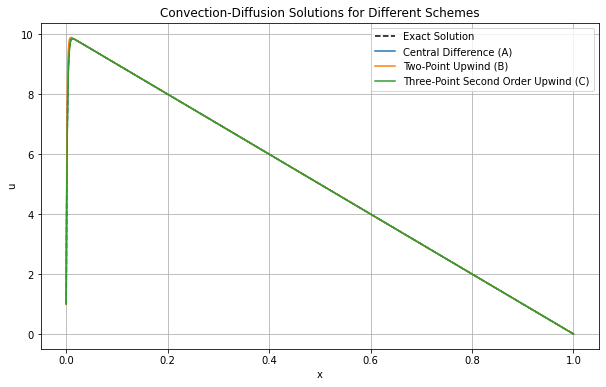

In [17]:
N = 1000  # Number of grid points
epsilon = 1/500  # Given value for epsilon
s = 10  # Source term

x = np.linspace(0, 1, N+1)

# Solve for each scheme
uA = solve_convection_diffusion(N, epsilon, s, 'A')
uB = solve_convection_diffusion(N, epsilon, s, 'B')
uC = solve_convection_diffusion(N, epsilon, s, 'C')
u_exact = exact_solution(x, epsilon, s)

# Plot
plt.figure(figsize=(10,6))
plt.plot(x, u_exact, 'k--', label="Exact Solution")
plt.plot(x, uA, label="Central Difference (A)")
plt.plot(x, uB, label="Two-Point Upwind (B)")
plt.plot(x, uC, label="Three-Point Second Order Upwind (C)")

plt.xlabel("x")
plt.ylabel("u")
plt.title("Convection-Diffusion Solutions for Different Schemes")
plt.legend()
plt.grid(True)
plt.show()


/Users/hewenhao/Library/Python/3.8/lib/python/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


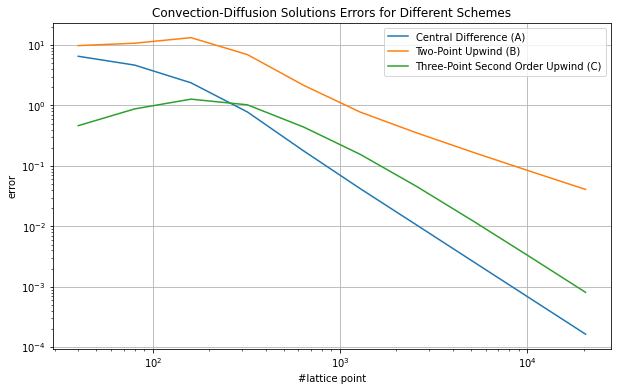

In [18]:
epsilon = 1/500  # Given value for epsilon
s = 10  # Source term
N0 = 20
ord_lst = list(range(1,11))
err_A = []
err_B = []
err_C = []
h_lst = []

for ord in ord_lst:
    N = N0*(2**ord)
    x = np.linspace(0, 1, N+1)
    # Solve for each scheme
    uA = solve_convection_diffusion(N, epsilon, s, 'A')
    uB = solve_convection_diffusion(N, epsilon, s, 'B')
    uC = solve_convection_diffusion(N, epsilon, s, 'C')
    u_exact = exact_solution(x, epsilon, s)
    
    err_A.append(np.linalg.norm(uA-u_exact,np.inf))
    err_B.append(np.linalg.norm(uB-u_exact,np.inf))
    err_C.append(np.linalg.norm(uC-u_exact,np.inf))
    h_lst.append(N)
    

    
# Plot
plt.figure(figsize=(10,6))
plt.plot(h_lst, err_A, label="Central Difference (A)")
plt.plot(h_lst, err_B, label="Two-Point Upwind (B)")
plt.plot(h_lst, err_C, label="Three-Point Second Order Upwind (C)")

plt.xlabel("#lattice point")
plt.ylabel("error")
plt.title("Convection-Diffusion Solutions Errors for Different Schemes")
plt.legend()
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.grid(True)
plt.show()

In [19]:
cut = 5
slopeA = stats.linregress(np.log(h_lst[cut:]),np.log(err_A[cut:]))
slopeB = stats.linregress(np.log(h_lst[cut:]),np.log(err_B[cut:]))
slopeC = stats.linregress(np.log(h_lst[cut:]),np.log(err_C[cut:]))
print("slopeA",slopeA)
print("slopeB",slopeB)
print("slopeC",slopeC)

slopeA LinregressResult(slope=-2.0012326700568286, intercept=11.153479213808449, rvalue=-0.999999892801903, pvalue=4.2132231692242286e-11, stderr=0.0005349898311584596, intercept_stderr=0.004599296247630705)
slopeB LinregressResult(slope=-1.0602083827723432, intercept=7.302140545957457, rvalue=-0.9997222238495822, pvalue=5.557227721349669e-06, stderr=0.01443057292371151, intercept_stderr=0.1240593297922502)
slopeC LinregressResult(slope=-1.902255340854438, intercept=11.806693327979504, rvalue=-0.9997492140070127, pvalue=4.767299470382493e-06, stderr=0.024601212875779578, intercept_stderr=0.21149610605070288)


In [20]:
np.exp(np.log(100)/2+np.log(1000)/2)

316.22776601683796